In [1]:
import pandas as pd
import csv
import sqlalchemy as sqAl
from sqlalchemy import create_engine




psql_username = 'postgres'
from config import psql_password 
database_name = 'postgres'
host = 'illinoiseducation.cseojgcrzzgi.us-east-1.rds.amazonaws.com'

connection_string = f'postgresql://{psql_username}:{psql_password}@{host}:5432/{database_name}'

engine = create_engine(connection_string)

In [2]:
fin_df = pd.read_sql("select * from financials", engine)
fin_df

,RCDTS,Type,District,City,County,District Type,District Size,Total School Tax Rate per $100 2016-17,Total Expenditures 2016-17,Education Fund 2016-17 - Dollars,General Admin 2016-17 - Dollars,Local Property Taxes 2016-17 - Dollars,General State Aid 2016-17 - Dollars,Federal Funding 2016-17 - Dollars
0,010010010260000,District,Payson CUSD 1,Payson,Adams,UNIT,MEDIUM,5.19,5143696.0,3225555.0,564111.0,2531179.0,1775730.0,389805.0
1,010010020260000,District,Liberty CUSD 2,Liberty,Adams,UNIT,MEDIUM,3.85,5443479.0,3907503.0,622126.0,2253278.0,1905501.0,362160.0
2,010010030260000,District,Central CUSD 3,Camp Point,Adams,UNIT,MEDIUM,3.64,7564187.0,5960372.0,770369.0,3128518.0,2892183.0,620882.0
3,010010040260000,District,CUSD 4,Mendon,Adams,UNIT,MEDIUM,5.59,6350671.0,4584398.0,671307.0,3634218.0,2318723.0,383059.0
4,010011720220000,District,Quincy SD 172,Quincy,Adams,UNIT,LARGE,4.04,92289055.0,48343392.0,2423593.0,39430662.0,12774845.0,8539441.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,56099201U260000,District,Crete Monee CUSD 201U,Crete,Will,UNIT,LARGE,8.63,81581856.0,51129825.0,1762740.0,48132481.0,12961928.0,4672336.0
845,56099207U260000,District,Peotone CUSD 207U,Peotone,Will,UNIT,MEDIUM,4.63,21225430.0,12507512.0,641779.0,16114818.0,876450.0,644859.0
846,56099209U260000,District,Wilmington CUSD 209U,Wilmington,Will,UNIT,MEDIUM,4.68,18288571.0,12289373.0,459145.0,10113226.0,2092655.0,2594452.0
847,56099255U260000,District,Reed Custer CUSD 255U,Braidwood,Will,UNIT,MEDIUM,3.89,41320015.0,17942896.0,829057.0,23739445.0,772564.0,1080635.0


In [3]:
fin_df.rename(columns = {'Total School Tax Rate per $100 2016-17':'TaxRate'}, inplace = True)
fin_df.rename(columns = {'Total Expenditures 2016-17':'Expenditures'}, inplace = True)
fin_df.rename(columns = {'Education Fund 2016-17 - Dollars':'EdFund'}, inplace = True)
fin_df.rename(columns = {'General Admin 2016-17 - Dollars':'GenAdmin'}, inplace = True)
fin_df.rename(columns = {'Local Property Taxes 2016-17 - Dollars':'PTax'}, inplace = True)
fin_df.rename(columns = {'General State Aid 2016-17 - Dollars':'StateAid'}, inplace = True)
fin_df.rename(columns = {'Federal Funding 2016-17 - Dollars':'FedFund'}, inplace = True)
fin_df = fin_df[fin_df["District"].str.contains("City of Chicago SD 299") == False]
fin_df

,RCDTS,Type,District,City,County,District Type,District Size,TaxRate,Expenditures,EdFund,GenAdmin,PTax,StateAid,FedFund
0,010010010260000,District,Payson CUSD 1,Payson,Adams,UNIT,MEDIUM,5.19,5143696.0,3225555.0,564111.0,2531179.0,1775730.0,389805.0
1,010010020260000,District,Liberty CUSD 2,Liberty,Adams,UNIT,MEDIUM,3.85,5443479.0,3907503.0,622126.0,2253278.0,1905501.0,362160.0
2,010010030260000,District,Central CUSD 3,Camp Point,Adams,UNIT,MEDIUM,3.64,7564187.0,5960372.0,770369.0,3128518.0,2892183.0,620882.0
3,010010040260000,District,CUSD 4,Mendon,Adams,UNIT,MEDIUM,5.59,6350671.0,4584398.0,671307.0,3634218.0,2318723.0,383059.0
4,010011720220000,District,Quincy SD 172,Quincy,Adams,UNIT,LARGE,4.04,92289055.0,48343392.0,2423593.0,39430662.0,12774845.0,8539441.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,56099201U260000,District,Crete Monee CUSD 201U,Crete,Will,UNIT,LARGE,8.63,81581856.0,51129825.0,1762740.0,48132481.0,12961928.0,4672336.0
845,56099207U260000,District,Peotone CUSD 207U,Peotone,Will,UNIT,MEDIUM,4.63,21225430.0,12507512.0,641779.0,16114818.0,876450.0,644859.0
846,56099209U260000,District,Wilmington CUSD 209U,Wilmington,Will,UNIT,MEDIUM,4.68,18288571.0,12289373.0,459145.0,10113226.0,2092655.0,2594452.0
847,56099255U260000,District,Reed Custer CUSD 255U,Braidwood,Will,UNIT,MEDIUM,3.89,41320015.0,17942896.0,829057.0,23739445.0,772564.0,1080635.0


In [4]:
fin_scores_df = pd.read_sql("select * from district_test_scores", engine)
fin_scores_df['ELA'] = pd.to_numeric(fin_scores_df['ELA'])
fin_scores_df['Math'] = pd.to_numeric(fin_scores_df['Math'])
fin_scores_df = fin_scores_df.astype({'ELA': int, 'Math': int})
fin_scores_df

,RCDTS,County,Dist #,District Name/ School Name,City,ELA,Math
0,010010010260000,Adams,10,Payson CUSD 1,Payson,524,489
1,010010020260000,Adams,20,Liberty CUSD 2,Liberty,500,485
2,010010030260000,Adams,30,Central CUSD 3,Camp Point,490,488
3,010010040260000,Adams,40,CUSD 4,Mendon,505,485
4,010011720220000,Adams,1720,Quincy SD 172,Quincy,489,473
...,...,...,...,...,...,...,...
482,56099201U260000,Will,201U,Crete Monee CUSD 201U,Crete,479,444
483,56099207U260000,Will,207U,Peotone CUSD 207U,Peotone,513,492
484,56099209U260000,Will,209U,Wilmington CUSD 209U,Wilmington,480,458
485,56099255U260000,Will,255U,Reed Custer CUSD 255U,Braidwood,479,483


In [5]:
school_size = pd.read_sql("select * from district", engine)
school_size = school_size.astype({'Student Enrollment - Total': float,
                                'Student Enrollment - Low Income %': float,
                                'Avg Class Size – All Grades': float,
                                'Avg Teaching Exp': float,
                                'Bachelor Degree': float,
                                'Masters Degree ': float,
                                'Teacher Retention Rate': float,
                                'Teacher Avg Salary': float,
                                'Admin Avg Salary': float})
school_size = school_size.filter(['RCDTS', 'Student Enrollment - Total'], axis = 1)
school_size.rename(columns = {'Student Enrollment - Total':'Enrollment'}, inplace = True)

In [6]:
fin_merge_df = pd.merge(fin_df, fin_scores_df, on = "RCDTS", how = "inner")

fin_merge_df = fin_merge_df.astype({"TaxRate": float, 'Expenditures': float, 'EdFund': float, 'GenAdmin': float,
'PTax': float, 'StateAid': float, 'FedFund': float})

fin_merge_df = pd.merge(fin_merge_df, school_size, how = 'inner')
fin_merge_df = fin_merge_df.dropna()
fin_merge_df = fin_merge_df.drop(columns = ['RCDTS', 'Type', "District", "City_x", 'District Type',
                                            'Dist # ', 'District Name/ School Name',
                                           'City_y'])

#fin_merge_df['TaxRate'] = fin_merge_df['TaxRate']/fin_merge_df['Enrollment']
fin_merge_df['Expenditures'] = fin_merge_df['Expenditures']/fin_merge_df['Enrollment'] 
fin_merge_df['EdFund'] = fin_merge_df['EdFund']/fin_merge_df['Enrollment'] 
fin_merge_df['GenAdmin'] = fin_merge_df['GenAdmin']/fin_merge_df['Enrollment']
fin_merge_df['PTax'] = fin_merge_df['PTax']/fin_merge_df['Enrollment']
fin_merge_df['StateAid'] = fin_merge_df['StateAid']/fin_merge_df['Enrollment']
fin_merge_df['FedFund'] = fin_merge_df['FedFund']/fin_merge_df['Enrollment']
fin_merge_df

,County_x,District Size,TaxRate,Expenditures,EdFund,GenAdmin,PTax,StateAid,FedFund,County_y,ELA,Math,Enrollment
0,Adams,MEDIUM,5.19,9201.602862,5770.223614,1009.143113,4528.048301,3176.618962,697.325581,Adams,524,489,559.0
1,Adams,MEDIUM,3.85,9042.323920,6490.868771,1033.431894,3742.986711,3165.284053,601.594684,Adams,500,485,602.0
2,Adams,MEDIUM,3.64,8654.676201,6819.647597,881.429062,3579.540046,3309.133867,710.391304,Adams,490,488,874.0
3,Adams,MEDIUM,5.59,9422.360534,6801.777448,996.004451,5392.014837,3440.241840,568.336795,Adams,505,485,674.0
4,Adams,LARGE,4.04,14266.355696,7473.085794,374.647241,6095.325707,1974.778946,1320.055805,Adams,489,473,6469.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Will,LARGE,8.63,16673.177192,10449.586143,360.257511,9837.008175,2649.075823,954.902105,Will,479,444,4893.0
467,Will,MEDIUM,4.63,14360.913396,8462.457375,434.221245,10903.124493,592.997294,436.305142,Will,513,492,1478.0
468,Will,MEDIUM,4.68,13497.100369,9069.647970,338.852399,7463.635424,1544.394834,1914.724723,Will,480,458,1355.0
469,Will,MEDIUM,3.89,27546.676667,11961.930667,552.704667,15826.296667,515.042667,720.423333,Will,479,483,1500.0


In [7]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

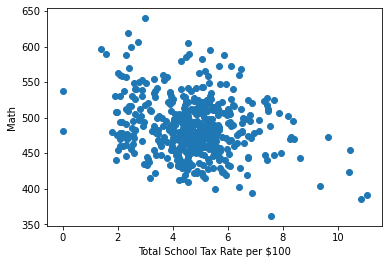

(471,)


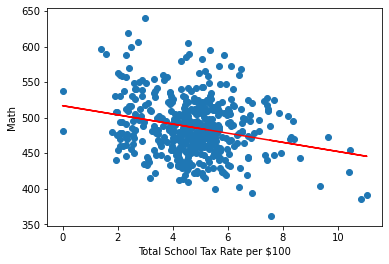

Coefficient  [-6.44555704]
Intercept  517.0205994175113


In [8]:
plt.scatter(fin_merge_df.TaxRate, fin_merge_df.Math)
plt.xlabel('Total School Tax Rate per $100')
plt.ylabel('Math')
plt.show()

X = fin_merge_df.TaxRate.values.reshape(-1, 1)
y = fin_merge_df.Math
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Total School Tax Rate per $100')
plt.ylabel('Math')
plt.plot(X, y_pred, color='red')
plt.savefig('Fin_Graphs/Fin_Math_TaxRate.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

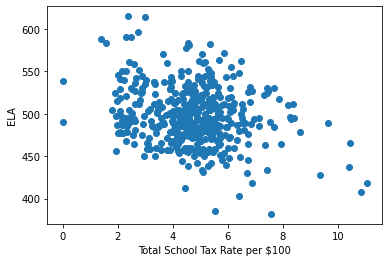

(471,)


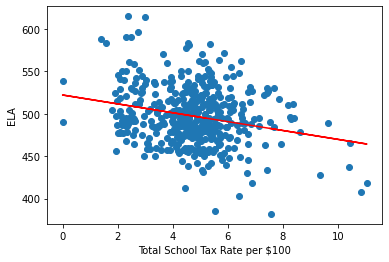

Coefficient  [-5.22963275]
Intercept  522.1631166950979


In [9]:
plt.scatter(fin_merge_df.TaxRate, fin_merge_df.ELA)
plt.xlabel('Total School Tax Rate per $100')
plt.ylabel('ELA')
plt.show()

X = fin_merge_df.TaxRate.values.reshape(-1, 1)
y = fin_merge_df.ELA
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Total School Tax Rate per $100')
plt.ylabel('ELA')
plt.plot(X, y_pred, color='red')
plt.savefig('Fin_Graphs/Fin_ELA_TaxRate.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

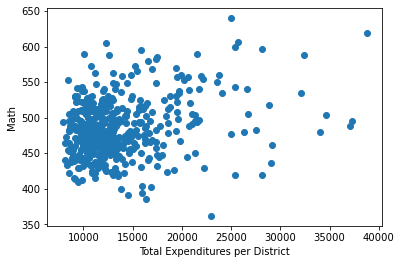

(471,)


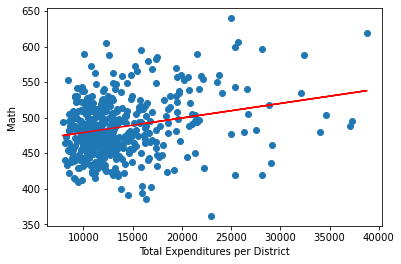

Coefficient  [0.00204731]
Intercept  458.7732391650669


In [10]:
plt.scatter(fin_merge_df.Expenditures, fin_merge_df.Math)
plt.xlabel('Total Expenditures per District')
plt.ylabel('Math')
plt.show()

X = fin_merge_df.Expenditures.values.reshape(-1, 1)
y = fin_merge_df.Math
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Total Expenditures per District')
plt.ylabel('Math')
plt.plot(X, y_pred, color='red')
plt.savefig('Fin_Graphs/Fin_Math_Expenditure.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

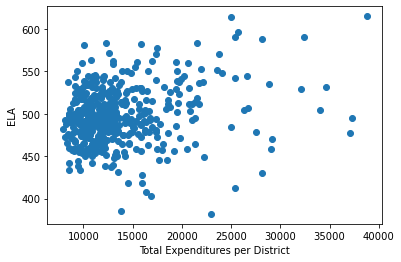

(471,)


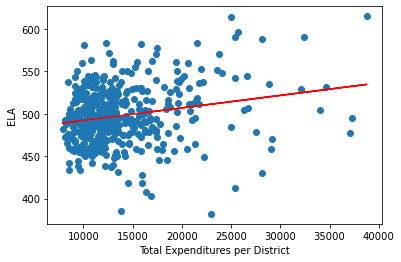

Coefficient  [0.00147628]
Intercept  477.42295721611333


In [11]:
plt.scatter(fin_merge_df.Expenditures, fin_merge_df.ELA)
plt.xlabel('Total Expenditures per District')
plt.ylabel('ELA')
plt.show()

X = fin_merge_df.Expenditures.values.reshape(-1, 1)
y = fin_merge_df.ELA
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Total Expenditures per District')
plt.ylabel('ELA')
plt.plot(X, y_pred, color='red')
plt.savefig('Fin_Graphs/Fin_ELA_Expenditure.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

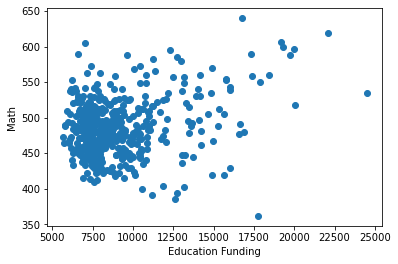

(471,)


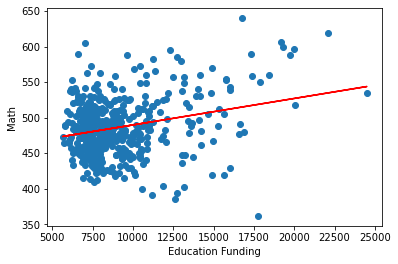

Coefficient  [0.00372571]
Intercept  452.68614335968834


In [12]:
plt.scatter(fin_merge_df.EdFund, fin_merge_df.Math)
plt.xlabel('Education Funding')
plt.ylabel('Math')
plt.show()

X = fin_merge_df.EdFund.values.reshape(-1, 1)
y = fin_merge_df.Math
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Education Funding')
plt.ylabel('Math')
plt.plot(X, y_pred, color='red')
plt.savefig('Fin_Graphs/Fin_Math_EdFund.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

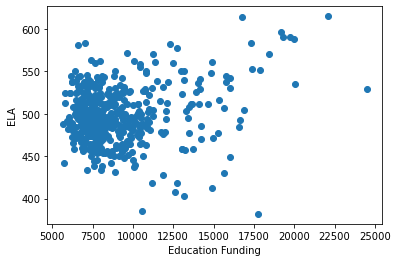

(471,)


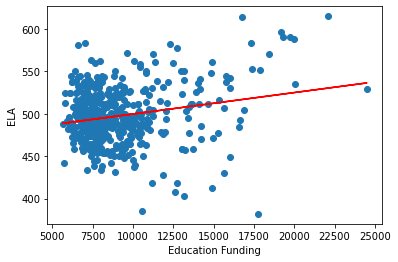

Coefficient  [0.00252661]
Intercept  474.4929621771302


In [13]:
plt.scatter(fin_merge_df.EdFund, fin_merge_df.ELA)
plt.xlabel('Education Funding')
plt.ylabel('ELA')
plt.show()

X = fin_merge_df.EdFund.values.reshape(-1, 1)
y = fin_merge_df.ELA
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Education Funding')
plt.ylabel('ELA')
plt.plot(X, y_pred, color='red')
plt.savefig('Fin_Graphs/Fin_ELA_EdFund.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

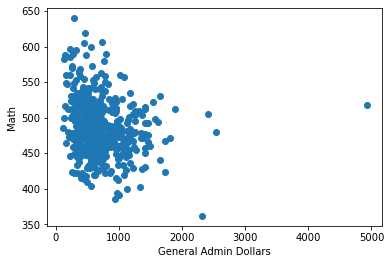

(471,)


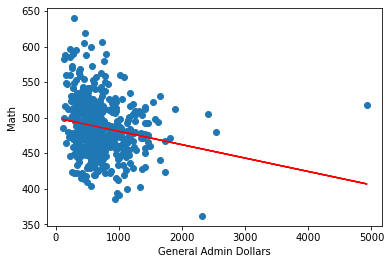

Coefficient  [-0.01885715]
Intercept  499.89551287039563


In [14]:
plt.scatter(fin_merge_df.GenAdmin, fin_merge_df.Math)
plt.xlabel('General Admin Dollars')
plt.ylabel('Math')
plt.show()

X = fin_merge_df.GenAdmin.values.reshape(-1, 1)
y = fin_merge_df.Math
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('General Admin Dollars')
plt.ylabel('Math')
plt.plot(X, y_pred, color='red')
plt.savefig('Fin_Graphs/Fin_Math_GenAdmDollar.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

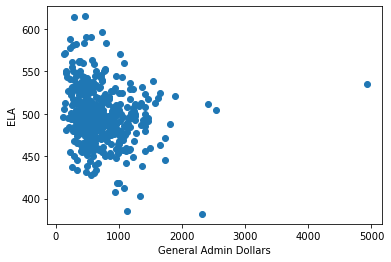

(471,)


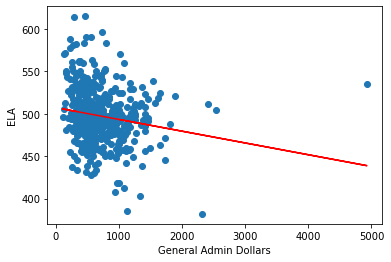

Coefficient  [-0.01387788]
Intercept  507.27201662095734


In [15]:
plt.scatter(fin_merge_df.GenAdmin, fin_merge_df.ELA)
plt.xlabel('General Admin Dollars')
plt.ylabel('ELA')
plt.show()

X = fin_merge_df.GenAdmin.values.reshape(-1, 1)
y = fin_merge_df.ELA
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('General Admin Dollars')
plt.ylabel('ELA')
plt.plot(X, y_pred, color='red')
plt.savefig('Fin_Graphs/Fin_ELA_GenAdmDollar.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

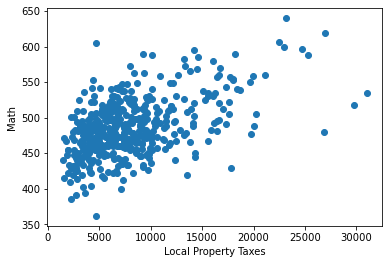

(471,)


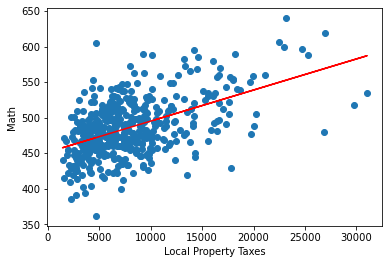

Coefficient  [0.00437257]
Intercept  451.60954907936537


In [16]:
plt.scatter(fin_merge_df.PTax, fin_merge_df.Math)
plt.xlabel('Local Property Taxes')
plt.ylabel('Math')
plt.show()

X = fin_merge_df.PTax.values.reshape(-1, 1)
y = fin_merge_df.Math
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Local Property Taxes')
plt.ylabel('Math')
plt.plot(X, y_pred, color='red')
plt.savefig('Fin_Graphs/Fin_Math_LocalPropTax.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

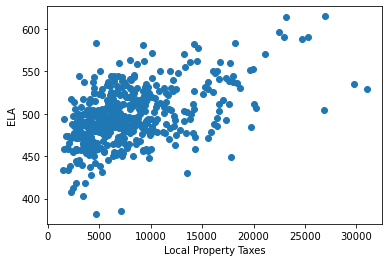

(471,)


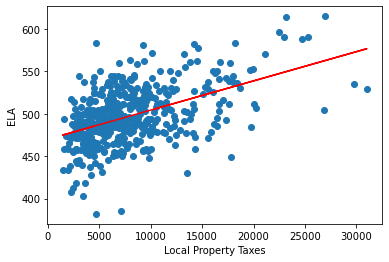

Coefficient  [0.00344527]
Intercept  469.913101495998


In [17]:
plt.scatter(fin_merge_df.PTax, fin_merge_df.ELA)
plt.xlabel('Local Property Taxes')
plt.ylabel('ELA')
plt.show()

X = fin_merge_df.PTax.values.reshape(-1, 1)
y = fin_merge_df.ELA
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Local Property Taxes')
plt.ylabel('ELA')
plt.plot(X, y_pred, color='red')
plt.savefig('Fin_Graphs/Fin_ELA_LocalPropTax.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

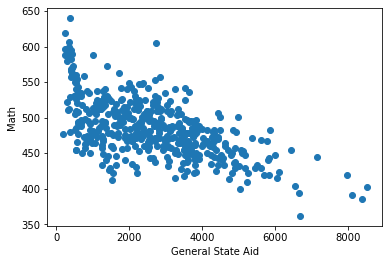

(471,)


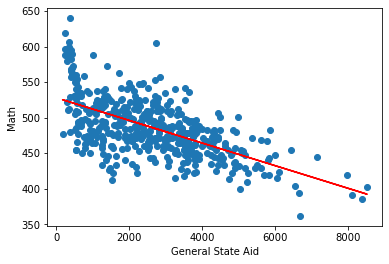

Coefficient  [-0.01592015]
Intercept  528.0856171325378


In [18]:
plt.scatter(fin_merge_df.StateAid, fin_merge_df.Math)
plt.xlabel('General State Aid')
plt.ylabel('Math')
plt.show()

X = fin_merge_df.StateAid.values.reshape(-1, 1)
y = fin_merge_df.Math
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('General State Aid')
plt.ylabel('Math')
plt.plot(X, y_pred, color='red')
plt.savefig('Fin_Graphs/Fin_Math_GenStateAid.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

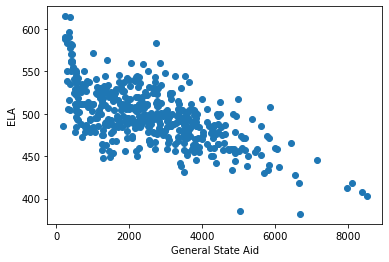

(471,)


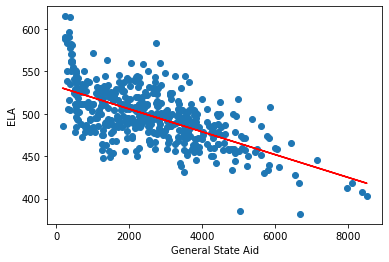

Coefficient  [-0.0134534]
Intercept  532.5361501666175


In [19]:
plt.scatter(fin_merge_df.StateAid, fin_merge_df.ELA)
plt.xlabel('General State Aid')
plt.ylabel('ELA')
plt.show()

X = fin_merge_df.StateAid.values.reshape(-1, 1)
y = fin_merge_df.ELA
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('General State Aid')
plt.ylabel('ELA')
plt.plot(X, y_pred, color='red')
plt.savefig('Fin_Graphs/Fin_ELA_GenStateAid.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

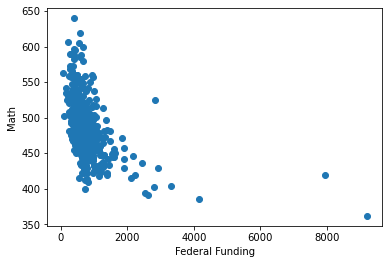

(471,)


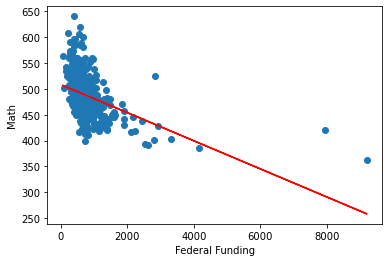

Coefficient  [-0.02712073]
Intercept  508.1192635126924


In [20]:
plt.scatter(fin_merge_df.FedFund, fin_merge_df.Math)
plt.xlabel('Federal Funding')
plt.ylabel('Math')
plt.show()

X = fin_merge_df.FedFund.values.reshape(-1, 1)
y = fin_merge_df.Math
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Federal Funding')
plt.ylabel('Math')
plt.plot(X, y_pred, color='red')
plt.savefig('Fin_Graphs/Fin_Math_FedFund.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

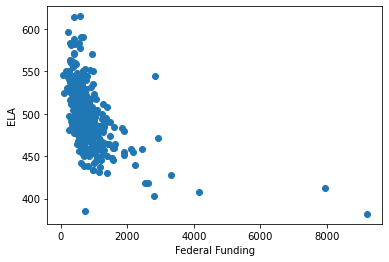

(471,)


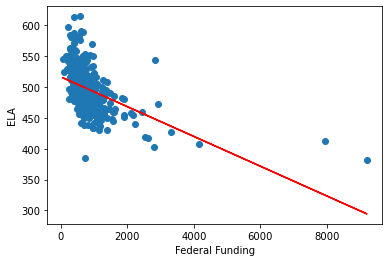

Coefficient  [-0.0241544]
Intercept  516.640515498811


In [21]:
plt.scatter(fin_merge_df.FedFund, fin_merge_df.ELA)
plt.xlabel('Federal Funding')
plt.ylabel('ELA')
plt.show()

X = fin_merge_df.FedFund.values.reshape(-1, 1)
y = fin_merge_df.ELA
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Federal Funding')
plt.ylabel('ELA')
plt.plot(X, y_pred, color='red')
plt.savefig('Fin_Graphs/Fin_ELA_FedFund.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)